 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Střední-chyba-průměru-a-velikost-vzorku" data-toc-modified-id="Střední-chyba-průměru-a-velikost-vzorku-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Střední chyba průměru a velikost vzorku</a></span></li><li><span><a href="http://localhost:8888/notebooks/07/07.ipynb#Interval-spolehlivosti" data-toc-modified-id="Interval-spolehlivosti-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Interval spolehlivosti</a></span></li></ul></div>

https://onlinecourses.science.psu.edu/stat100/node/58

https://en.wikipedia.org/wiki/Standard_error

http://www.stat.wmich.edu/s216/book/node79.html

http://www.cyclismo.org/tutorial/R/pValues.html#t-test


# Intervaly spolehlivosti

V této lekci si ukážeme, jak v R z vašich dat získat intervaly spolehlivosti pro populační průměr za předpokladu, že náhodná veličina má normální rozdělení. Normální rozdělení náhodné veličiny není vždy zaručené, a proto byste si to měli vždy nějak ověřit. Těmto metodám se však budeme věnovat až trochu později, potom co si probereme i testování statistických hypotéz.

## Střední chyba průměru a velikost vzorku

Pokud se v reálném světě pokoušíte stanovit skutečnou hodnotu nějaké veličiny pomocí opakovaných měření, musíte se vždy potýkat s určitou experimentální chybou, která v ideálním případě závisí pouze na náhodných jevech. Ve světě, ve kterém žijeme, se vám totiž bohužel nikdy nepovede naměřit stejnou hodnotu ve 100% případů. Jako příklad by nám zde mohl posloužit experiment Alberta A. Michelsona, který se v roce 1879 pokoušel stanovit rychlost světla pomocí experimentu s [čočkou a jednoduchou soustavou dvou zrcadel](http://www.gutenberg.org/files/11753/11753-h/11753-h.htm). Měření několikrát opakoval a my máme jeho data k dispozici v souboru `michelson_velocitylight.csv`:

In [1]:
df_lightspeed <- read.table(
    "michelson_velocitylight.csv"
    , stringsAsFactors = F
    , header = T
)
head(df_lightspeed)

vellightair
850
740
900
1070
930
850


Čísla v tabulce jsou rychlosti světla v $\frac{km}{s}$, od kterých bylo odečteno číslo $299 \times 10^{3}$. Jelikož budeme najednou pracovat pouze s jednou proměnnou, nebotřebujeme v tomto případě objekt `data.frame`, ale vystačíme si pouze s vektorem:

In [2]:
lightspeed <- df_lightspeed$vellightair
class(lightspeed)

[1] "integer"

Pojďme se podívat, kolik měření Albert celkem provedl:

In [3]:
length(lightspeed)

[1] 100

Albert tedy provedl celkem 100 měření této náhodné veličiny. Skutečná rychlost světla by tedy měla v ideálním případě ležet někde v blízkosti průměru z těchto měření:

In [4]:
mean(lightspeed)

[1] 852.4

V jaké blízkosti bychom však měli skutečnou hodnotu čekat a s jakou pravděpodobností? Odpověď na tuto otázku získáme na konci této lekce. Nechme však teď Alberta na chvíli být a pojďme se podívat jak v praxi velikost našeho vzoruku ovlivňuje přesnost našeho odhadu.

V následujícím příkladě jsme si pomocí funkce `rnorm` nasimulovali dva vzorky různých velikostí (`x` a `x_big`) z populace s průměrem 32 a směrodatnou odchylkou 0.66:

In [5]:
x <- rnorm(30, mean = 42, sd = 0.666)
x_big <- rnorm(10000, mean = 42, sd = 0.666)

mean(x)
sd(x)
mean(x_big)
sd(x_big)

[1] 42.11223

[1] 0.6652797

[1] 42.00156

[1] 0.6667975

Průměr a směrodatná odchylka obou vzorků se tedy shruba blíží skutečnosti. Je však jasné, že odhad by byl přesnější při použití většího vzorku, `x_big`. 

Chybu, kterou při odhadu skutečného průměru uděláme, reprezentuje tzv. střední chyba průměru:

${\displaystyle {\text{SE}}_{\bar {x}}\ ={\frac {\sigma }{\sqrt {n}}}}$

Tato veličina vyjadřuje směrodatnou odchylku chyb při odhadu populačního průměru a jak je vidět tak opravdu klesá s počtem vzorků ($n$). V našem simulovaném příkladě si jej pro naše vzorky můžeme snadno spočítat:

In [6]:
sd(x) / sqrt(length(x))
sd(x_big) / sqrt(length(x_big))

[1] 0.1214629

[1] 0.006667975

Opravdu tedy platí, že mnohem přesnější odhad získáme použitím velkého vzorku. 

## Interval spolehlivosti

Vzhledem k tomu, že střední chyba průměru má normální rozdělení, lze interval spolehlivosti pro průměr definovat následujícím způsobem:

${\displaystyle \left({\bar {x}}-z^{*}{\sigma  \over {\sqrt {n}}},{\bar {x}}+z^{*}{\sigma  \over {\sqrt {n}}}\right)}$

$z$ zde představuje násobek směrodatné odchylky chyb, který je odvozen ze standardního normálního rozdělení, tedy s průměrem nula a směrodatnou odchylkou 1. 

$z$ je vlastně počet směrodatných odchylek chyb od jejich průměrné hodnoty a určuje tak pravděpodobnost, že opravdová chyba průměru bude ležet v určitém intervalu. Tato pravděpodobnost vyplývá z funkce hustoty pravděpodobnosti normálního rozdělení, kterou si můžeme v R snadno vykreslit pomocí funkce `dnorm` například následujícím způsobem:

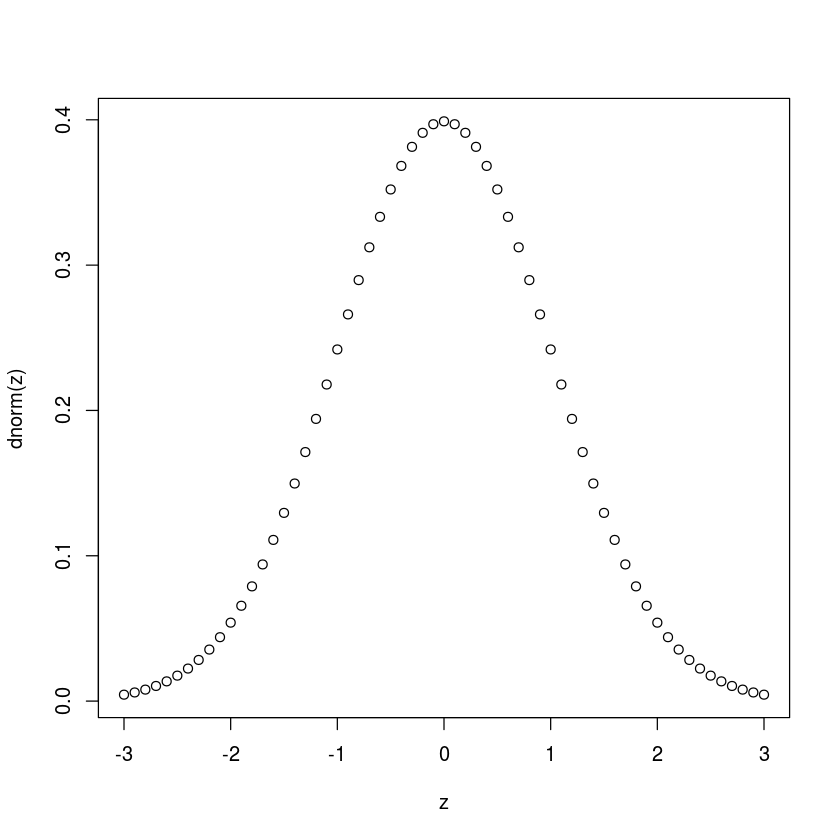

In [7]:
z <- seq(-3, 3, 0.1)
plot(z, dnorm(z))

Proměnná `z` zde tedy představuje možné hodnoty směrodatných odchylek, které pak vyneseme proti příslušným hodnotám hustoty pravděpodobnosti pomocí funkce `plot`. Funkce `plot` je v R univerzální funkcí pro kreslení nejrůznějších grafů a podrobněji se jí budeme věnovat v jedné z dalších lekcí. Tato funkce akceptuje nespočet argumentů, které se týkají způsobu vizualizace. V našem případě jí můžeme například snadno nakázat, aby naše body proložila křivkou:

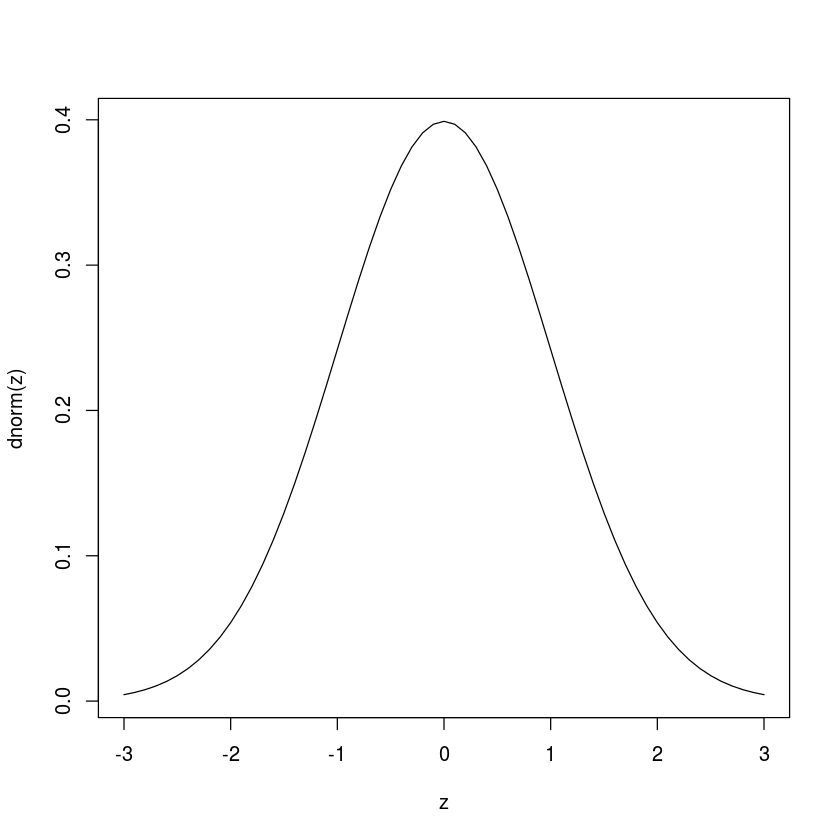

In [8]:
plot(z, dnorm(z), type = 'l')

Vraťme se teď však zpět ke statistice. Pro hustotu pravděpodonosti platí následující vztah:

$\Pr[a\leq X\leq b]=\int _{a}^{b}f_{X}(x)\,dx.$

Pravděpodobnost, že náhodná veličina nabývá hodnot v určitém intervalu od $a$ do $b$, je tedy dána integrálem hustoty pravděpodobnosti právě mezi body $a$ a $b$. Pokud tedy chceme na určité úrovni pravděpodobnosti odhadnout naší chybu, musíme hodnotu $z$ zvolit odpovídajícím způsobem.

Pojďme si teď tedy z didaktických důvodů rychle vytvořit funkci pro jednoduchý výpočet určitého integrálu. Můžeme tak učinit implementací lichoběžníkové metody, která integrál libovolné funkce definuje takto:

${\displaystyle \int _{a}^{b}f(x)\,dx\approx \sum _{k=1}^{N}{\frac {f(x_{k-1})+f(x_{k})}{2}}\Delta x_{k}}$

Pokud platí:

${\displaystyle \Delta x_{k}=\Delta x={\frac {b-a}{N}}}$

lze tento vztah převést na:

${\displaystyle \int _{a}^{b}f(x)\,dx\approx {\frac {\Delta x}{2}}\sum _{k=1}^{N}\left(f(x_{k-1})+f(x_{k})\right)}$

${\displaystyle {}={\frac {\Delta x}{2}}(f(x_{0})+2f(x_{1})+2f(x_{2})+2f(x_{3})+\dotsb +2f(x_{N-1})+f(x_{N}))}$

což můžeme snadno naprogramovat například takto:

In [9]:
integrate <- function(a, b, steps, func, ...) {
    # integrace funkce ("func") jedné proměnné v intervalu od "a" do "b"
    # lichoběžníkovou metodou s určitým počtem kroků ("steps")
    
    if (a > b) stop("a > b") 
    
    dx <- (b - a) / steps
    y <- func(seq(a, b, dx), ...)
    
    0.5 * dx * (
        y[1] 
        + sum(2*y[c(-1, -length(y))]) 
        + y[length(y)]
    )
}

Že naše funkce funguje si můžeme snadno ověřit po dosazení známých empirických pravidel:

In [10]:
integrate(-1, 1, 100, dnorm) * 100
integrate(-1.96, 1.96, 100, dnorm) * 100
integrate(-3, 3, 100, dnorm) * 100

[1] 68.26734

[1] 94.99749

[1] 99.72922

Máme tak tedy například 95% šanci, že $z$ bude nabývat hodnot v intervalu $\left(-1.96, 1.96\right)$. Čili na 95% bude skutečná chyba v odhadu našeho průměru v intervalu $\left(-1.96^{*}{\sigma  \over {\sqrt {n}}}, 1.96^{*}{\sigma  \over {\sqrt {n}}}\right)$.

Ve statistice se též často používá tzv. distribuční funkce, která je definována následujícím způsobem:

$F_{X}(x)=\mathrm {Pr} [X\leq x]=\int _{-\infty }^{x}f_{X}(t)\,dt.$

Tato funkce je v R k disopozici pod názvem `pnorm`:

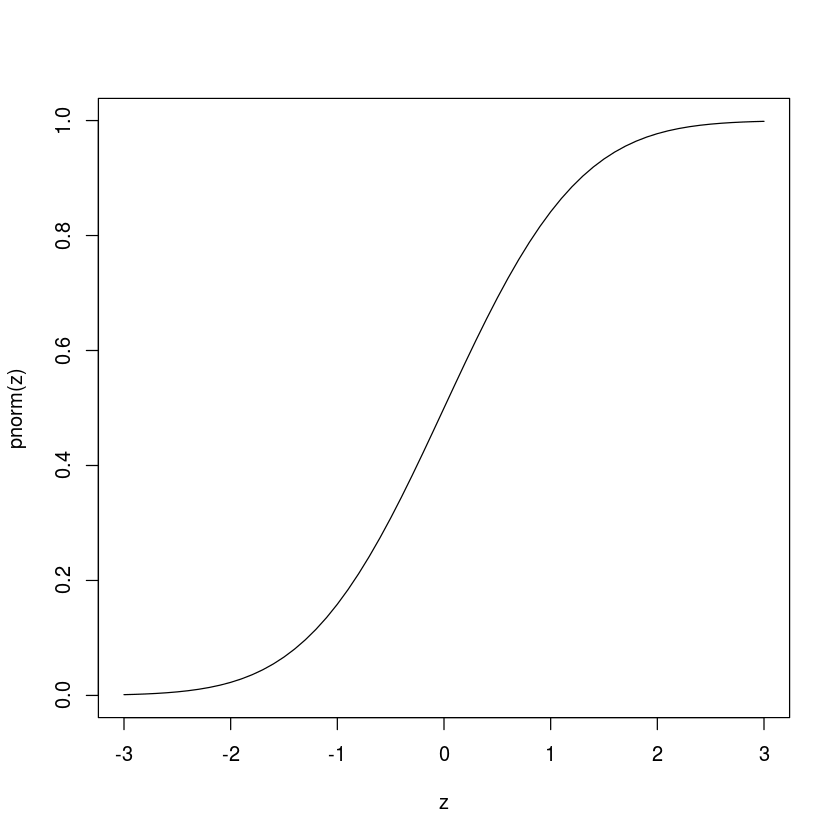

In [11]:
plot(z, pnorm(z), type = 'l')

a vrací tedy pravděpodobnost, že $z$ bude v intervalu $\left(-\infty, x\right)$. Pravděpodobnost, že naše chyba bude menší než $-1.96^{*}{\sigma  \over {\sqrt {n}}}$ je tedy:

In [12]:
pnorm(-1.96)

[1] 0.0249979

a naopak pravděpodobnost, že bude větší než $1.96^{*}{\sigma  \over {\sqrt {n}}}$ je potom:

In [13]:
1 - pnorm(1.96)

[1] 0.0249979

Celková pravděpodobnost, že se dopustíme chyby v intervalu $\left(-1.96^{*}{\sigma  \over {\sqrt {n}}}, 1.96^{*}{\sigma  \over {\sqrt {n}}}\right)$, je pak tedy podle této funkce opět 95%:

In [14]:
1 - (pnorm(-1.96) + 1 - pnorm(1.96))

[1] 0.9500042

V praxi se však nejčastěji používá inverzní funkce k této distribuční funkci, neboli též kvantilová funkce, která mapuje příslušné hodnoty pravděpodobnosti na konkrétní hodnoty $z$. V R je dostupná jako funkce `qnorm`:

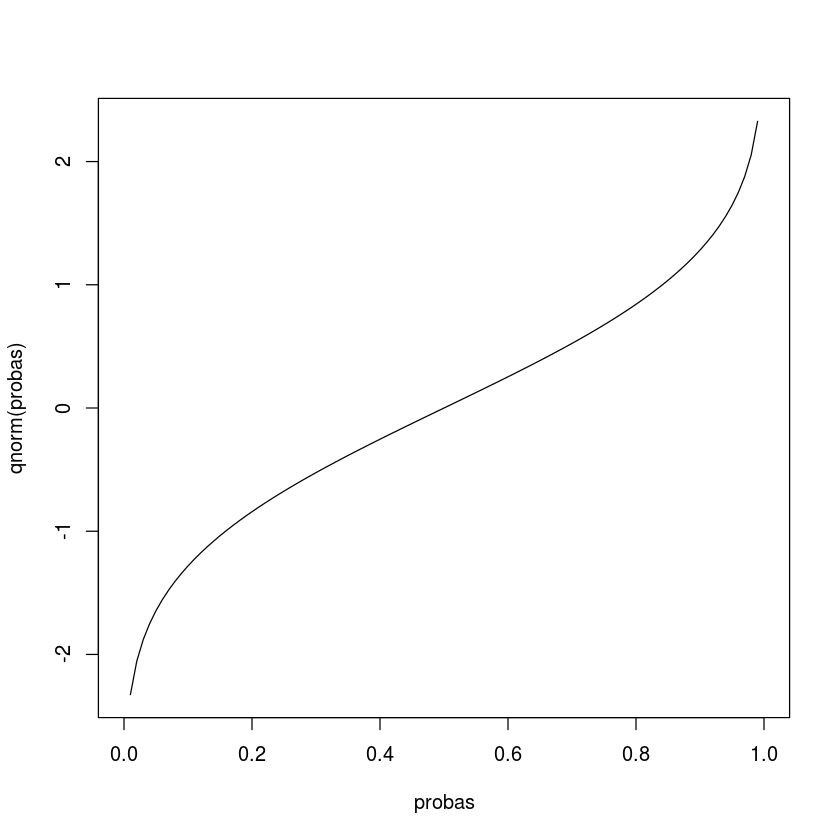

In [15]:
probas <- seq(0, 1, 0.01)
plot(probas, qnorm(probas), type = "l")

Hodnotu $z$ pro interval spolehlivosti na 5% hladině pravděpodobnosti bychom tedy snadno získali takto:

In [16]:
qnorm(0.975)

[1] 1.959964

Výpočet intervalu spolehlivosti v případě Alberotvých měření je tedy nasnadě: